In [1]:
# Overview of Challenge: 
#
# Challenge
# In tmdb_5000_movies.csv you’ll find the top movies as listed by https://www.themoviedb.org/
# (https://www.themoviedb.org/). Read in the file and then:
# 1. Produce a summary of the dataset - size/shape, column headers, unique values etc.
# 2. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your
# observations.
# 3. Self led exploration - Do any data exploration you think would be of interest and create visualisations that show your
# work and support observations.
# 4. Create your own top 250 - Use the formula below to create a new top 250 and check if where it maps with the
# ranking in the database provided(source https://en.wikipedia.org/wiki/IMDb#Rankings (https://en.wikipedia.org
# /wiki/IMDb#Rankings)):
#
# Where:
# W = weighted rating
# R = average rating for the movie as a number from 1 to 10 (vote_average)
# v = number of votes for the movie (vote_count)
# m = minimum votes required to be listed in the Top 250 (currently 25,000)
# C = the mean vote across the whole report

In [2]:
# Overview of Scripts
## Imports
## Read CSV
## Challenge 1
## Challenge 2
## Challenge 3
## Challenge 4

In [3]:
# Imports 
import os
import pandas as pd
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn' - removing unwanted warnings
sns.set_theme()

In [4]:
# Check CSV file titled "IMDB_500_Movies.csv" & then read file
cwd = os.getcwd()
csvPath = cwd + "/IMDB_500_Movies.csv"
try:
    rawData = pd.read_csv(csvPath)
    # Generate DataFrame using Pandas
    df = pd.DataFrame(rawData)
except FileNotFoundError:
    raise FileNotFoundError(
        "Attempted to read the file: "
        + csvPath
        + "\n The file was not found. Please check the csv is named correctly (IMDB_500_Movies.csv) and in the root directory of this script!"
    )

In [5]:
# Challenge 1. Produce a summary of the dataset - size/shape, column headers, unique values etc.
# Using Pandas create Generic Info Overview of DataFrame
# this data provides the RangeIndex (number of enteries)
# and the Data columns (number of columns)
# it also gives generic data type information and the number of non-null datapoints for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Challenge 1cont. Produce a summary of the dataset - size/shape, column headers, unique values etc.
# The above cell seems against the intention of the question, so below is a recreation of this data in my own methods
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
dat_types = df.dtypes  # gives both name of column and datatypes

print(f"Row count:\n{count_row}\n")
print(f"Column count:\n{count_col}\n")
print(f"Data types:\n{dat_types}\n")

Row count:
10866

Column count:
21

Data types:
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object



In [7]:
# Challenge 2. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your observations.
# Using Pandas, create description that gives more statistics on DataFrame
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

In [8]:
# Challenge 2cont. Calculate basic statistics of the data - (max, mins, count, mean, std, etc) and examine data and state your observations.
# Again, the above cell seems against the intention of the question, so below is a recreation of this data in my own methods
# List key points of interest (poi)
poi = [
    "id",
    "popularity",
    "budget",
    "revenue",
    "runtime",
    "vote_count",
    "vote_average",
    "release_year",
    "budget_adj",
    "revenue_adj",
]

# Loop over points of interest
for val in poi:
    coldata = df[val]

    val_num = coldata.count()
    val_mean = round(coldata.mean(), 1)
    val_min = coldata.min()
    val_max = coldata.max()
    val_std = round(coldata.std(), 1)

    print(
        f"Column Name: {val}      \tCount:{val_num}\tMean:{val_mean}\tMin:{val_min}\tMax:{val_max}\tStd:{val_std}"
    )

Column Name: id      	Count:10866	Mean:66064.2	Min:5	Max:417859	Std:92130.1
Column Name: popularity      	Count:10866	Mean:0.6	Min:6.500000000000001e-05	Max:32.985763	Std:1.0
Column Name: budget      	Count:10866	Mean:14625701.1	Min:0	Max:425000000	Std:30913213.8
Column Name: revenue      	Count:10866	Mean:39823319.8	Min:0	Max:2781505847	Std:117003486.6
Column Name: runtime      	Count:10866	Mean:102.1	Min:0	Max:900	Std:31.4
Column Name: vote_count      	Count:10866	Mean:217.4	Min:10	Max:9767	Std:575.6
Column Name: vote_average      	Count:10866	Mean:6.0	Min:1.5	Max:9.2	Std:0.9
Column Name: release_year      	Count:10866	Mean:2001.3	Min:1960	Max:2015	Std:12.8
Column Name: budget_adj      	Count:10866	Mean:17551039.8	Min:0.0	Max:425000000.0	Std:34306155.7
Column Name: revenue_adj      	Count:10866	Mean:51364363.3	Min:0.0	Max:2827123750.0	Std:144632485.0


Most movies are between 100 and 200 mins long with some exceptions


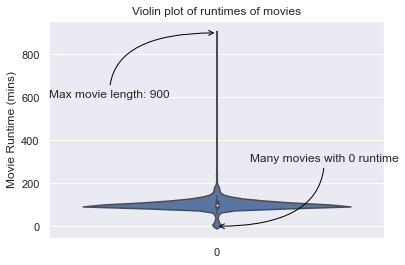

In [9]:
# Challenge 2cont.
# Plot and find outliers for runtime
ax = sns.violinplot(data=df["runtime"])
ax.set_title("Violin plot of runtimes of movies")
ax.set(xlabel="", ylabel="Movie Runtime (mins)")
ax.annotate(
    "Many movies with 0 runtime",
    xy=(0, 0),
    xytext=(0.1, 300),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=-90,angleB=0"
    ),
)
ax.annotate(
    f"Max movie length: {df['runtime'].max()}",
    xy=(0, df["runtime"].max()),
    xytext=(-0.5, 600),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=-90,angleB=0"
    ),
)
print(f"Most movies are between 100 and 200 mins long with some exceptions")

In [10]:
# Challenge 2cont.
# From the boxplot above it seems that there are many movies that are not populated correctly
no_runtime = df[df.runtime == df.runtime.min()]
no_budget = df[df.budget == df.budget.min()]
no_revenue = df[df.revenue == df.revenue.min()]

print(f"Number of movies with 0 mins runtime: {no_runtime.id.count()}")
print(f"Number of movies with 0 budget:  {no_budget.id.count()}")
print(f"Number of movies with 0 revenue: {no_revenue.id.count()}")

# Thats alot of movies with 0 budget or revenue
# Do the same movies had adjusted budgets/revenues?
all_broken_budget = (
    no_budget[no_budget.budget_adj == 0].id.count() == no_budget.id.count()
)
print(f"All movies with 0 budget have 0 adjusted budjet: {all_broken_budget}")

# broken_budget_revenue = qry_budget[qry_budget.id == qry_revenue.id]
broken_budget_revenue = pd.merge(no_budget, no_revenue, on=["id"], right_index=True)
print(
    f"number of movies with broken budget and revenue: {broken_budget_revenue.id.count()}"
)

Number of movies with 0 mins runtime: 31
Number of movies with 0 budget:  5696
Number of movies with 0 revenue: 6016
All movies with 0 budget have 0 adjusted budjet: True
number of movies with broken budget and revenue: 4701


In [11]:
# Challenge 3. Self led exploration - Do any data exploration you think would be of interest and create visualisations that show your work and support observations.
# Create column for profit
df["profit_adj"] = df["revenue_adj"] - df["budget_adj"]
# get top 250 movies from vote_average alone and do some analysis
df.sort_values(by=["vote_average"], inplace=True, ascending=False)
top250 = df.head(250)

# create row for profit generated by movie
print(top250["profit_adj"].describe())


count    2.500000e+02
mean     1.067981e+08
std      2.914454e+08
min     -1.200000e+08
25%      0.000000e+00
50%      0.000000e+00
75%      5.267301e+07
max      2.750137e+09
Name: profit_adj, dtype: float64


Medium Correlation Coefficient, budjet does have an impact on increasing profits


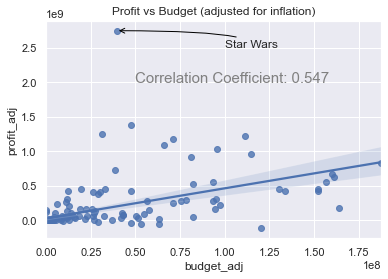

In [12]:
# Challenge 3cont.
# plot profit vs budget with line of best fit
ax = sns.regplot(x=top250["budget_adj"], y=top250["profit_adj"])
ax.set_title("Profit vs Budget (adjusted for inflation)")

# Add labels to the plot
style = dict(size=15, color="gray")
# find corrilation between profit and budget, then display on axis
corr_coef = round(top250["budget_adj"].corr(top250["profit_adj"]), 3)
ax.text(0.5e8, 2.0e9, f"Correlation Coefficient: {corr_coef}", **style)
# find and annotate the most profitable movie
top250.sort_values(by=["profit_adj"], inplace=True, ascending=False)
top1 = top250.head(1)
ax.annotate(
    f"{top1['original_title'].values[0]}",
    xy=(top1["budget_adj"], top1["profit_adj"]),
    xytext=(1e8, 2.5e9),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=-90,angleB=0"
    ),
)
print(
    f"Medium Correlation Coefficient, budjet does have an impact on increasing profits"
)

Low Correlation Coefficient, runtime does not have a significant impact on profits


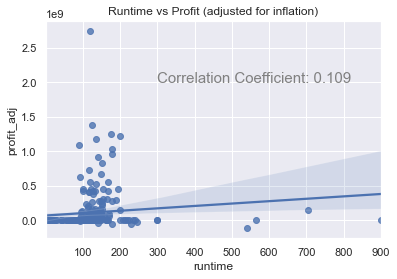

In [13]:
# plot screentime vs profit with line of best fit
ax = sns.regplot(x=top250["runtime"], y=top250["profit_adj"])
ax.set_title("Runtime vs Profit (adjusted for inflation)")

# Add labels to the plot
style = dict(size=15, color="gray")
# find corrilation between profit and budget, then display on axis
corr_coef = round(top250["runtime"].corr(top250["profit_adj"]), 3)
ax.text(300, 2.0e9, f"Correlation Coefficient: {corr_coef}", **style)
print(
    f"Low Correlation Coefficient, runtime does not have a significant impact on profits"
)

The SRG Coding Challenge pdf states that m = minimum votes required to be listed in the Top 250 (currently 25,000)
However maximum number of votes is 9767, changing m to 2500



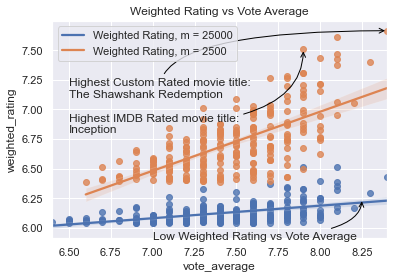

In [14]:
# Challenge4. Create your own top 250 - Use the formula below to create a new top 250 and check if where it maps with the
# ranking in the database provided(source https://en.wikipedia.org/wiki/IMDb#Rankings (https://en.wikipedia.org
# /wiki/IMDb#Rankings)):
# W = (R*V + C*m)/(v+m)
# Where:
# W = weighted rating
# R = average rating for the movie as a number from 1 to 10 (vote_average)
# v = number of votes for the movie (vote_count)
# m = minimum votes required to be listed in the Top 250 (currently 25,000)
# C = the mean vote across the whole report

R = df["vote_average"]
v = df["vote_count"]
m = 25000
C = df["vote_average"].mean()

# generate weighted rating and find top 250
df["weighted_rating"] = (R * v + C * m) / (v + m)
df.sort_values(by=["weighted_rating"], inplace=True, ascending=False)
custom250 = df.head(250)

# plot weighted rating vs vote average to compare results
ax = sns.regplot(x=custom250["vote_average"], y=custom250["weighted_rating"])
ax.set_title("Weighted Rating vs Vote Average")

ax.annotate(
    f"Low Weighted Rating vs Vote Average",
    xy=(8.25, 6.24),
    xytext=(7, 5.9),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=0,angleB=-90"
    ),
)

print(
    f"The SRG Coding Challenge pdf states that m = minimum votes required to be listed in the Top 250 (currently 25,000)\n"
    + f"However maximum number of votes is {df['vote_count'].max()}, changing m to 2500\n"
)

R = df["vote_average"]
v = df["vote_count"]
m = 2500
C = df["vote_average"].mean()

# generate weighted rating and find top 250
df["weighted_rating"] = (R * v + C * m) / (v + m)
df.sort_values(by=["weighted_rating"], inplace=True, ascending=False)
custom250_fix = df.head(250)

sns.regplot(x=custom250_fix["vote_average"], y=custom250_fix["weighted_rating"])
ax.legend(labels=["Weighted Rating, m = 25000", "Weighted Rating, m = 2500"])


ax.annotate(
    f"Highest Custom Rated movie title:\n{custom250_fix['original_title'].values[0]}",
    xy=(
        custom250_fix["vote_average"].values[0],
        custom250_fix["weighted_rating"].values[0],
    ),
    xytext=(6.5, 7.1),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=90,angleB=0"
    ),
)

ax.annotate(
    f"Highest IMDB Rated movie title:\n{custom250['original_title'].values[0]}",
    xy=(custom250["vote_average"].values[0], custom250["weighted_rating"].values[0]),
    xytext=(6.5, 6.8),
    arrowprops=dict(
        arrowstyle="->", color="black", connectionstyle="angle3,angleA=0,angleB=90"
    ),
)

cf250 = custom250_fix

Lower Correlation Coefficient for Weighted Ratings than IMDB Ratings, but still budjet does have an impact on increasing profits


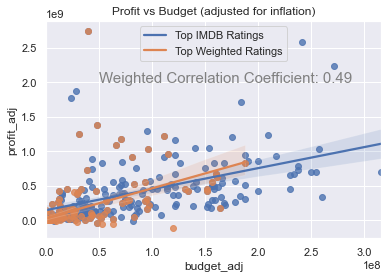

In [15]:
# plot for comparison of my top 250 vs weighted rating top 250
# plot profit vs budget with line of best fit
ax = sns.regplot(x=cf250["budget_adj"], y=cf250["profit_adj"])
sns.regplot(x=top250["budget_adj"], y=top250["profit_adj"])
ax.set_title("Profit vs Budget (adjusted for inflation)")

ax.legend(labels=["Top IMDB Ratings", "Top Weighted Ratings"])

# Add labels to the plot
style = dict(size=15, color="gray")
# find corrilation between profit and budget, then display on axis
corr_coef = round(cf250["budget_adj"].corr(cf250["profit_adj"]), 3)
ax.text(0.5e8, 2.0e9, f"Weighted Correlation Coefficient: {corr_coef}", **style)

print(
    f"Lower Correlation Coefficient for Weighted Ratings than IMDB Ratings, but still budjet does have an impact on increasing profits"
)

In [16]:
# Find Movie Director with most movies in top 250
best_director_imdb = top250["director"].value_counts().head(1)
print(
    f"Director with the most number of movies in the IMDB top 250 is: {best_director_imdb.index[0]} with {best_director_imdb.values[0]} movies"
)

best_director_custom = cf250["director"].value_counts().head(1)
print(
    f"Director with the most number of movies in the custom top 250 is: {best_director_custom.index[0]} with {best_director_custom.values[0]} movies"
)

Director with the most number of movies in the IMDB top 250 is: Martin Scorsese with 6 movies
Director with the most number of movies in the custom top 250 is: Steven Spielberg with 9 movies


C:\Users\Barney\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
Most common keyword is based on novel with 12 apperances


[Text(0.5, 0, 'Number of Occurances a keyword appears'),
 Text(0, 0.5, 'Unique Keywords (log scale)')]

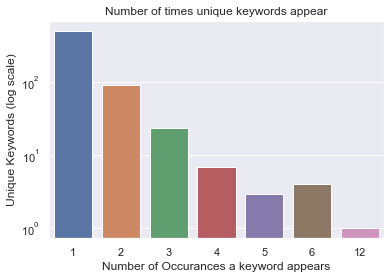

In [17]:
# Find most tagged keywords
all_keywords = top250["keywords"].value_counts()
key_list = []
idx_list = []
# find all keywords - and associated id. Add to seperate lists to make a dataframe later
for index, value in all_keywords.items():
    for word in index.split("|"):
        idxs = top250[top250["keywords"].str.contains(word, na = False)].id          
        for i in range(value):
            #print(word)           
            key_list.append(word)
            if idxs.values.size > 0:
                idx_list.append(idxs.values[i])
            else:
                idx_list.append(None)

keywords = pd.DataFrame({"Keyword" : key_list, "id" : idx_list})
print(
    f"Most common keyword is {keywords.value_counts().index[0][0]} with {keywords.value_counts().values[0]} apperances"
)

# Stats on stats
sos = keywords.value_counts().value_counts()
ax = sns.barplot(x=sos.index, y=sos.values)
ax.set_yscale("log")
ax.set_title("Number of times unique keywords appear")
ax.set(
    xlabel="Number of Occurances a keyword appears",
    ylabel="Unique Keywords (log scale)",
)